In [1]:
### Convert Keras to TF-Lite

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from keras.applications.xception import preprocess_input

In [3]:
tf.__version__

'2.11.0'

In [4]:
model = keras.models.load_model("xception_v6_ep_07_ac_0.868.h5")

In [5]:
path="./5089843a-ecf8-4cb6-8f35-587f19125046.jpg"

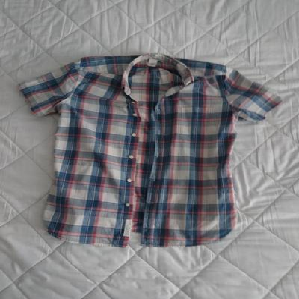

In [6]:
img = load_img(path, target_size=(299,299))
img

In [7]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [8]:
X.shape

(1, 299, 299, 3)

In [9]:
predictions = model.predict(X)

1/1 [==============================] - 1s 619ms/step


In [10]:
classes = ['dress',
        'hat',
        'longsleeve',
        'outwear',
        'pants',
        'shirt',
        'shoes',
        'shorts',
        'skirt',
        't-shirt']

dict(zip(classes, predictions[0]))

{'dress': 1.1892418,
 'hat': -3.0889487,
 'longsleeve': 0.6365838,
 'outwear': -0.78047425,
 'pants': -2.2749834,
 'shirt': 4.503017,
 'shoes': -3.1544049,
 'shorts': -1.1494956,
 'skirt': -2.339603,
 't-shirt': -1.4198945}

### Convert model from Keras to TF-Lite

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf_lite_model = converter.convert()

with open("chothing-model.tflite", "wb") as f_out:
    f_out.write(tf_lite_model)

INFO:tensorflow:Assets written to: C:\Users\soumy\AppData\Local\Temp\tmpdbfv0sw_\assets


INFO:tensorflow:Assets written to: C:\Users\soumy\AppData\Local\Temp\tmpdbfv0sw_\assets


In [12]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

print(interpreter.get_input_details()[0])
print(interpreter.get_output_details()[0])

{'name': 'serving_default_input_28:0', 'index': 0, 'shape': array([  1, 299, 299,   3]), 'shape_signature': array([ -1, 299, 299,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'StatefulPartitionedCall:0', 'index': 229, 'shape': array([ 1, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [14]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [15]:
dict(zip(classes, preds[0]))

{'dress': 1.1892397,
 'hat': -3.0889478,
 'longsleeve': 0.6365861,
 'outwear': -0.7804721,
 'pants': -2.2749808,
 'shirt': 4.503016,
 'shoes': -3.1544034,
 'shorts': -1.149496,
 'skirt': -2.3396046,
 't-shirt': -1.4198973}

### Removing TF dependency while reading image

In [16]:
path="./5089843a-ecf8-4cb6-8f35-587f19125046.jpg"

In [17]:
from PIL import Image
import tensorflow.lite as tflite

C:\Users\soumy\AppData\Local\Temp\ipykernel_12468\446674501.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = f_in.resize((299,299), Image.NEAREST)


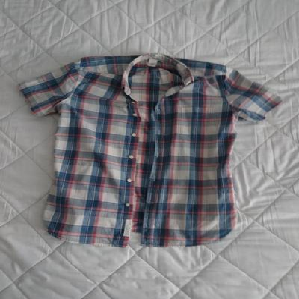

In [18]:
with Image.open(path) as f_in:
    img = f_in.resize((299,299), Image.NEAREST)

img

In [19]:
def preprocess_input(x):
    x /= 127.5
    x -= 1
    return x

In [20]:
x = np.array(img, dtype="float32")
X = np.array([x])

X = preprocess_input(X)

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf_lite_model = converter.convert()

with open("chothing-model.tflite", "wb") as f_out:
    f_out.write(tf_lite_model)

INFO:tensorflow:Assets written to: C:\Users\soumy\AppData\Local\Temp\tmpqevfqbio\assets


INFO:tensorflow:Assets written to: C:\Users\soumy\AppData\Local\Temp\tmpqevfqbio\assets


In [22]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

print(interpreter.get_input_details()[0])
print(interpreter.get_output_details()[0])

{'name': 'serving_default_input_28:0', 'index': 0, 'shape': array([  1, 299, 299,   3]), 'shape_signature': array([ -1, 299, 299,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'StatefulPartitionedCall:0', 'index': 229, 'shape': array([ 1, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)
dict(zip(classes, preds[0]))

{'dress': 1.1892397,
 'hat': -3.0889478,
 'longsleeve': 0.6365861,
 'outwear': -0.7804721,
 'pants': -2.2749808,
 'shirt': 4.503016,
 'shoes': -3.1544034,
 'shorts': -1.149496,
 'skirt': -2.3396046,
 't-shirt': -1.4198973}

In [24]:
# python3 -m pip install tflite-runtime

In [25]:
#import tflite_runtime.interpreter as tflite
# from tflite_run

In [1]:
import tensorflow.lite as tflite
from io import BytesIO
from urllib import request
import numpy as np
from PIL import Image
#from keras_image_helper import create_preprocessor

#preprocessor = create_preprocessor('xception', target_size=(299, 299))

interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

classes = ['dress',
        'hat',
        'longsleeve',
        'outwear',
        'pants',
        'shirt',
        'shoes',
        'shorts',
        'skirt',
        't-shirt']

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def preprocess_input(url):
    
    x = download_image(url)
    x = x.resize((299, 299), Image.NEAREST)
    #with Image.open(url) as f_in:
    #    x = f_in.resize((299,299), Image.NEAREST)
    arr = np.array(x, dtype="float32")
    arr = np.array([arr])
    arr /= 127.5
    arr -= 1.
    return arr


def predict(img_arr):
    interpreter.set_tensor(input_index, img_arr)
    interpreter.invoke()

    preds = interpreter.get_tensor(output_index)
    return preds[0]

def decode_result(pred):
    result = {c: float(p) for c, p in zip(classes, pred)}
    return result

def lambda_handler(event, context):
    url = event["url"]
    #X = preprocessor.from_url(url)
    X = preprocess_input(url)
    preds = predict(X)
    results = decode_result(preds)
    return results


In [2]:
event = {"url": "http://bit.ly/mlbookcamp-pants"}#"5089843a-ecf8-4cb6-8f35-587f19125046.jpg"}#
lambda_handler(event, None)

NameError: name 'Image' is not defined